### Introduction

We are provided with 3 text files:

* ticdata2000.txt consist of all the predictors along with target variable for training our model.
* ticeval2000.txt consist of all the test data used for testing the model we learned from training data with a missing target predictor.
* tictgts2000.txt consist of targets for evaluation set used for finding hit rate or score.

Data set consists of 86 columns, 1-43 attribute containing socio-demographic data and 44-86 attributes containing product ownership. Attribute 86 - CARAVAN: Number of mobile home policies.

### Import Libraries

In [1]:
%load_ext tensorboard
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)

2.3.0


### Import Data

In [2]:
pd.options.display.float_format = '{:.1f}'.format
columns = ['MOSTYPE Customer Subtype', 'MAANTHUI Number of houses','MGEMOMV Avg size household','MGEMLEEF Avg age',
 'MOSHOOFD Customer','MGODRK Roman catholic','MGODPR Protestant','MGODOV Other religion','MGODGE No religion',
 'MRELGE Married','MRELSA Living together','MRELOV Other relation','MFALLEEN Singles','MFGEKIND Household without children',
 'MFWEKIND Household with children','MOPLHOOG High level education','MOPLMIDD Medium level education',
 'MOPLLAAG Lower level education','MBERHOOG High status','MBERZELF Entrepreneur','MBERBOER Farmer','MBERMIDD Middle management',
 'MBERARBG Skilled labourers','MBERARBO Unskilled labourers','MSKA Social class A','MSKB1 Social class B1', 'MSKB2 Social class B2',
 'MSKC Social class C','MSKD Social class D','MHHUUR Rented house','MHKOOP Home owners','MAUT1 1 car','MAUT2 2 cars',
 'MAUT0 No car','MZFONDS National Health Service','MZPART Private health insurance','MINKM30 Income < 30.000',
 'MINK3045 Income 30-45.000','MINK4575 Income 45-75.000','MINK7512 Income 75-122.000','MINK123M Income >123.000',
 'MINKGEM Average income','MKOOPKLA Purchasing power class','PWAPART Contribution private third party insurance',
 'PWABEDR Contribution third party insurance (firms)','PWALAND Contribution third party insurane (agriculture)',
 'PPERSAUT Contribution car policies','PBESAUT Contribution delivery van policies','PMOTSCO Contribution motorcycle/scooter policies',
 'PVRAAUT Contribution lorry policies','PAANHANG Contribution trailer policies','PTRACTOR Contribution tractor policies',
 'PWERKT Contribution agricultural machines policies' ,'PBROM Contribution moped policies',
 'PLEVEN Contribution life insurances','PPERSONG Contribution private accident insurance policies','PGEZONG Contribution family accidents insurance policies',
 'PWAOREG Contribution disability insurance policies','PBRAND Contribution fire policies','PZEILPL Contribution surfboard policies',
 'PPLEZIER Contribution boat policies','PFIETS Contribution bicycle policies','PINBOED Contribution property insurance policies',
 'PBYSTAND Contribution social security insurance policies','AWAPART Number of private third party insurance 1 - 12',
 'AWABEDR Number of third party insurance (firms)','AWALAND Number of third party insurane (agriculture)','APERSAUT Number of car policies',
 'ABESAUT Number of delivery van policies','AMOTSCO Number of motorcycle/scooter policies','AVRAAUT Number of lorry policies',
 'AAANHANG Number of trailer policies','ATRACTOR Number of tractor policies','AWERKT Number of agricultural machines policies',
 'ABROM Number of moped policies','ALEVEN Number of life insurances','APERSONG Number of private accident insurance policies',
 'AGEZONG Number of family accidents insurance policies','AWAOREG Number of disability insurance policies',
 'ABRAND Number of fire policies','AZEILPL Number of surfboard policies','APLEZIER Number of boat policies',
 'AFIETS Number of bicycle policies','AINBOED Number of property insurance policies','ABYSTAND Number of social security insurance policies',
 'CARAVAN Number of mobile home policies']
crvn_dataframe = pd.read_csv('ticdata2000.txt', delim_whitespace= True , names=columns)
crvn_dataframe = crvn_dataframe.reindex(np.random.permutation(crvn_dataframe.index))
crvn_dataframe.head()


,MOSTYPE Customer Subtype,MAANTHUI Number of houses,MGEMOMV Avg size household,MGEMLEEF Avg age,MOSHOOFD Customer,MGODRK Roman catholic,MGODPR Protestant,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies
3599,6,2,3,3,2,2,4,1,3,6,...,0,0,0,0,0,0,0,0,0,0
3705,8,1,2,4,2,2,2,2,5,7,...,0,0,0,1,0,0,0,0,0,0
5053,8,1,3,3,2,2,6,0,2,9,...,0,0,0,0,0,0,0,0,0,0
3421,36,1,3,3,8,0,7,0,2,6,...,0,0,0,2,0,0,0,0,0,0
1267,33,2,4,2,8,0,5,1,4,8,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crvn_dataframe.shape

(5822, 86)

In [4]:
crvn_test = pd.read_csv('ticeval2000.txt', delim_whitespace= True )

crvn_test = crvn_test.reindex(np.random.permutation(crvn_dataframe.index))
crvn_test.head()



,33,1,4,2,8,0,6,0.1,3,5,...,0.37,0.38,0.39,0.40,1.12,0.41,0.42,0.43,0.44,0.45
794,24.0,1.0,3.0,2.0,5.0,1.0,6.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,30.0,1.0,2.0,4.0,7.0,0.0,9.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2847,34.0,2.0,3.0,2.0,8.0,0.0,7.0,0.0,2.0,7.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,32.0,1.0,2.0,4.0,7.0,0.0,6.0,1.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3386,13.0,1.0,3.0,3.0,3.0,0.0,6.0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
crvn_tgt = pd.read_csv('tictgts2000.txt', delim_whitespace= True )
crvn_tgt = crvn_tgt.reindex(np.random.permutation(crvn_dataframe.index))

crvn_tgt.head()

,0
2084,0.0
3859,0.0
3156,0.0
473,0.0
4247,nan


### Pre-Processing

In [6]:
crvn_dataframe = crvn_dataframe.dropna(axis=0)
crvn_test = crvn_test.dropna(axis=0)
crvn_tgt = crvn_tgt.dropna(axis=0)
selected_features = crvn_dataframe.drop(columns = ['CARAVAN Number of mobile home policies'])
selected_features.head()

,MOSTYPE Customer Subtype,MAANTHUI Number of houses,MGEMOMV Avg size household,MGEMLEEF Avg age,MOSHOOFD Customer,MGODRK Roman catholic,MGODPR Protestant,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,ALEVEN Number of life insurances,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies
3599,6,2,3,3,2,2,4,1,3,6,...,0,0,0,0,0,0,0,0,0,0
3705,8,1,2,4,2,2,2,2,5,7,...,0,0,0,0,1,0,0,0,0,0
5053,8,1,3,3,2,2,6,0,2,9,...,0,0,0,0,0,0,0,0,0,0
3421,36,1,3,3,8,0,7,0,2,6,...,0,0,0,0,2,0,0,0,0,0
1267,33,2,4,2,8,0,5,1,4,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
output_targets = crvn_dataframe['CARAVAN Number of mobile home policies'].astype('category').cat.codes
output_targets.head()

3599    0
3705    0
5053    0
3421    0
1267    0
dtype: int8

### Train/Validation Split

In [8]:
# Examples for training
training_examples = selected_features
training_targets = output_targets

# Normalize the training data
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Examples for validation
validation_examples = crvn_test
validation_targets = crvn_tgt 

# Normalize the validation data
scaler = StandardScaler().fit(validation_examples.values)
scaledf = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(scaledf, index=validation_examples.index, columns=validation_examples.columns)

training_examples.head(10)

,MOSTYPE Customer Subtype,MAANTHUI Number of houses,MGEMOMV Avg size household,MGEMLEEF Avg age,MOSHOOFD Customer,MGODRK Roman catholic,MGODPR Protestant,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,ALEVEN Number of life insurances,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies
3599,-1.4,2.2,0.4,0.0,-1.3,1.3,-0.4,-0.1,-0.2,-0.1,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
3705,-1.3,-0.3,-0.9,1.2,-1.3,1.3,-1.5,0.9,1.1,0.4,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
5053,-1.3,-0.3,0.4,0.0,-1.3,1.3,0.8,-1.1,-0.8,1.5,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
3421,0.9,-0.3,0.4,0.0,0.8,-0.7,1.4,-1.1,-0.8,-0.1,...,-0.2,-0.1,-0.1,-0.1,2.5,-0.0,-0.1,-0.2,-0.1,-0.1
1267,0.7,2.2,1.7,-1.2,0.8,-0.7,0.2,-0.1,0.5,1.0,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
3164,-0.0,-0.3,0.4,-1.2,-0.3,-0.7,-2.1,-1.1,3.0,-1.7,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
4313,-1.3,-0.3,-0.9,1.2,-1.3,1.3,-1.5,-0.1,1.1,-0.6,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
5620,0.1,-0.3,-2.1,2.5,0.1,-0.7,-0.4,-0.1,0.5,-2.7,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
2289,-1.8,-0.3,-0.9,1.2,-1.7,-0.7,0.8,0.9,-0.8,1.5,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,8.2
3767,1.1,2.2,2.9,-1.2,1.1,0.3,0.2,-1.1,-0.2,0.4,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1


In [9]:
#Summary of training and validation example

print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,MOSTYPE Customer Subtype,MAANTHUI Number of houses,MGEMOMV Avg size household,MGEMLEEF Avg age,MOSHOOFD Customer,MGODRK Roman catholic,MGODPR Protestant,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,ALEVEN Number of life insurances,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies
count,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,...,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-0.3,-2.1,-2.4,-1.7,-0.7,-2.7,-1.1,-2.0,-3.2,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
25%,-1.1,-0.3,-0.9,-1.2,-1.0,-0.7,-0.4,-1.1,-0.8,-0.6,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
50%,0.4,-0.3,0.4,0.0,0.4,-0.7,0.2,-0.1,-0.2,-0.1,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
75%,0.8,-0.3,0.4,0.0,0.8,0.3,0.8,0.9,0.5,0.4,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
max,1.3,21.9,2.9,3.7,1.5,8.3,2.5,3.9,3.6,1.5,...,21.0,13.7,12.3,25.8,11.4,44.0,24.4,14.1,22.0,16.5


Validation examples summary:


,33,1,4,2,8,0,6,0.1,3,5,...,0.37,0.38,0.39,0.40,1.12,0.41,0.42,0.43,0.44,0.45
count,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,...,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0,3999.0
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-0.3,-2.2,-2.5,-1.7,-0.7,-2.7,-1.0,-2.0,-3.3,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
25%,-1.1,-0.3,-0.9,-0.0,-1.0,-0.7,-0.4,-1.0,-0.8,-0.6,...,-0.2,-0.1,-0.1,-0.1,-1.0,-0.0,-0.1,-0.2,-0.1,-0.1
50%,0.4,-0.3,0.4,-0.0,0.4,-0.7,0.2,-0.0,-0.2,-0.1,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
75%,0.8,-0.3,0.4,-0.0,0.8,0.3,0.8,1.0,0.5,0.4,...,-0.2,-0.1,-0.1,-0.1,0.8,-0.0,-0.1,-0.2,-0.1,-0.1
max,1.3,21.1,4.3,3.8,1.5,8.0,2.5,4.0,3.5,1.5,...,12.5,16.9,9.9,16.3,9.7,25.8,27.6,19.2,10.3,8.6


Training targets summary:


count   5822.0
mean       0.1
std        0.2
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
dtype: float64

Validation targets summary:


,0
count,3999.0
mean,0.1
std,0.2
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [10]:
# Check the baseline:
print("check the distribution of training target variable:")
frequency = training_targets.value_counts(normalize =True)
print(frequency * 100)

print("check the distribution of validation target variable:")
frequency = validation_targets['0'].value_counts(normalize =True)
print(frequency * 100)


check the distribution of training target variable:
0   94.0
1    6.0
dtype: float64
check the distribution of validation target variable:
0.0   94.0
1.0    6.0
Name: 0, dtype: float64


## Build model

In [11]:
 baseline_model = keras.Sequential([
     keras.layers.Dense(85, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l1(0.1),
                       input_shape=(training_examples.shape[1],)),
     keras.layers.Dropout(0.25),
     keras.layers.Dense(40 , kernel_regularizer=keras.regularizers.l1(0.1),activation=tf.nn.relu), 
     keras.layers.Dropout(0.25),
     keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 85)                7310      
_________________________________________________________________
dropout (Dropout)            (None, 85)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 10,791
Trainable params: 10,791
Non-trainable params: 0
_________________________________________________________________


### Fit Model

In [12]:
EPOCHS = 50
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Epoch 1/50
182/182 [==============================] - 1s 8ms/step - loss: 39.5264 - accuracy: 0.7953 - val_loss: 1.9894 - val_accuracy: 0.9405
Epoch 2/50
182/182 [==============================] - 1s 5ms/step - loss: 0.5249 - accuracy: 0.9402 - val_loss: 0.3537 - val_accuracy: 0.9405
Epoch 3/50
182/182 [==============================] - 1s 6ms/step - loss: 0.3548 - accuracy: 0.9402 - val_loss: 0.3501 - val_accuracy: 0.9405
Epoch 4/50
182/182 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.9402 - val_loss: 0.3519 - val_accuracy: 0.9405
Epoch 5/50
182/182 [==============================] - 1s 4ms/step - loss: 0.3550 - accuracy: 0.9402 - val_loss: 0.3499 - val_accuracy: 0.9405
Epoch 6/50
182/182 [==============================] - 1s 5ms/step - loss: 0.3545 - accuracy: 0.9402 - val_loss: 0.3502 - val_accuracy: 0.9405
Epoch 7/50
182/182 [==============================] - 1s 5ms/step - loss: 0.3559 - accuracy: 0.9402 - val_loss: 0.3513 - val_accuracy: 0.9405
Epoch

### Model Accuracy 

In [19]:
print("Minimum accuracy of validation is: ", min(b_history.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history.history['val_accuracy']))

Minimum accuracy of validation is:  0.9404851198196411
Maximum accuracy of validation is:  0.9404851198196411


In [20]:
print("Minimum accuracy of model is: ", min(b_history.history['accuracy']))
print("Maximum accuracy of model is: ", max(b_history.history['accuracy']))

Minimum accuracy of model is:  0.7952593564987183
Maximum accuracy of model is:  0.9402267336845398


### Precision, Recall and f1-score

In [21]:
from sklearn.metrics import classification_report
predictions = baseline_model.predict_classes(validation_examples)
print(classification_report(validation_targets,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3761
         1.0       0.00      0.00      0.00       238

    accuracy                           0.94      3999
   macro avg       0.47      0.50      0.48      3999
weighted avg       0.88      0.94      0.91      3999



### Predictions

In [16]:
valpreds = baseline_model.predict_on_batch(validation_examples.iloc[1:10])
print(valpreds)

[[0.06024283]
 [0.06024286]
 [0.06024289]
 [0.06024283]
 [0.06024277]
 [0.06024289]
 [0.06024289]
 [0.06024191]
 [0.06024277]]


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets.iloc[1:10])

       0
3859 0.0
3156 0.0
473  0.0
2458 0.0
3686 0.0
677  0.0
850  0.0
1469 0.0
2029 0.0


### Plot Results

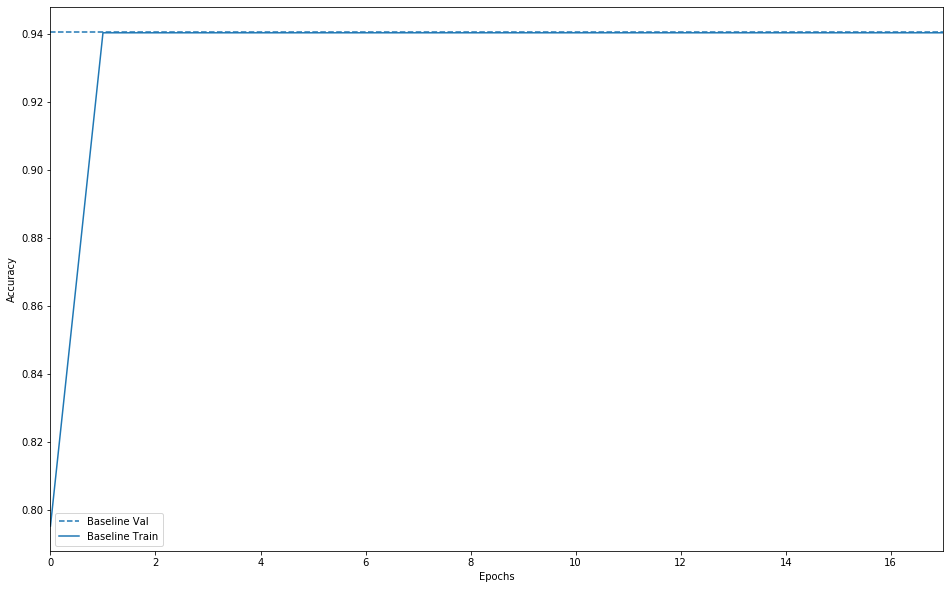

In [18]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  #plt.ylim([.7,.9])

plot_history([('baseline', b_history)])

### Inference:

The output type of this model is binary so the activation function used here is 'sigmoid', loss function is 'binary_crossentropy', optimizer is 'rmsprop' and metric used is 'accuracy'. This is a case of imbalanced binary classification model which is why we also need to check other metrics such as f1 score and recall to evaluate our model. The minimum validation accuracy of this model is 94.04% and is exceeding baseline accuracy of 94%.